# Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

from sklearn import metrics, preprocessing
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [2]:
app_train = pd.read_pickle("../data/transformed/app_train_cleaned.pkl")

In [3]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 249 entries, SK_ID_CURR to FE_PAYMENT_RATE
dtypes: bool(1), float64(71), int64(43), uint8(134)
memory usage: 307.0 MB


# Preprocessing

In [4]:
app_train.dtypes.value_counts()

uint8      134
float64     71
int64       43
bool         1
dtype: int64

## Fix target imbalance

### Manually

In [ ]:
# before : imbalanced classes
app_train.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [ ]:
# keep same number of target_1 than target_0
target_1_count = app_train[app_train.TARGET == 1].shape[0]
app_train_balanced = pd.concat(
    [
        app_train[app_train.TARGET == 1].sample(target_1_count),
        app_train[app_train.TARGET == 0].sample(target_1_count),
    ]
)
# after
app_train_balanced.TARGET.value_counts()

1    24825
0    24825
Name: TARGET, dtype: int64

## Split train test

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    app_train_balanced.drop("TARGET", axis=1), app_train_balanced.TARGET
)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37237, 248)
(12413, 248)
(37237,)
(12413,)


## Scaling

In [ ]:
# Scaling
scaler = preprocessing.MinMaxScaler()
# fit on train
scaler.fit(X_train)
# transform train and test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Imputing

In [ ]:
# Imputing with mean
imputer = SimpleImputer(strategy="mean")

# Fit on train
imputer.fit(X_train)

# Transform train and test
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# Modeling

## Logistic Regression

In [ ]:
# Make the model with the specified regularization parameter
log_reg = LogisticRegression(max_iter=500)
dummy = DummyClassifier()

# Train on the training data
log_reg.fit(X_train, y_train)
# dummy.fit(X_train, y_train)

/usr/local/miniconda3/envs/p7env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
y_pred

array([0, 1, 0, ..., 1, 1, 0])

# Scoring metric

In [ ]:
y_pred.mean()

0.49995971964875535

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.675984854587932

Sensibilité : 1.00
Spécificité : 0.00
Seuil : 0.00


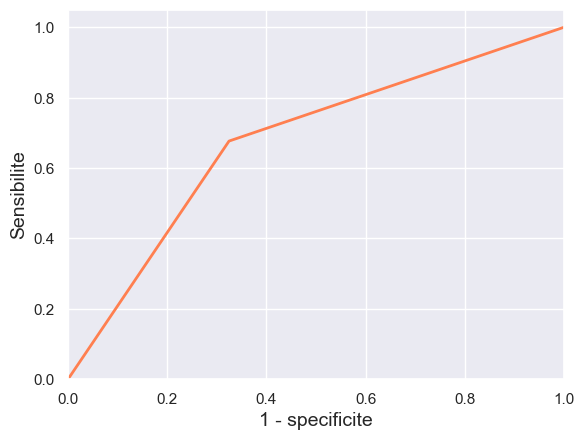

In [ ]:
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color="coral", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("1 - specificite", fontsize=14)
plt.ylabel("Sensibilite", fontsize=14)

# indice du premier seuil pour lequel
# la sensibilité est supérieure à 0.95
idx = np.min(np.where(tpr > 0.95))

print("Sensibilité : {:.2f}".format(tpr[idx]))
print("Spécificité : {:.2f}".format(1 - fpr[idx]))
print("Seuil : {:.2f}".format(thr[idx]))